## Assignment 2
## Oktaviani // PYTN-KS16-02

---


### Project Overview
Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

### This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.
Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

### Import Library

In [1]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [3]:
df  = pd.read_csv('dataset/nyc-rolling-sales.csv')

In [5]:
# menampilkan semua kolom
pd.set_option('display.max.columns', None)
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [8]:
df.shape

(84548, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

In [10]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [11]:
df.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

### Missing Values

In [27]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)
df.shape

(84548, 19)

In [13]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [16]:
df.isnull().values.any()

False

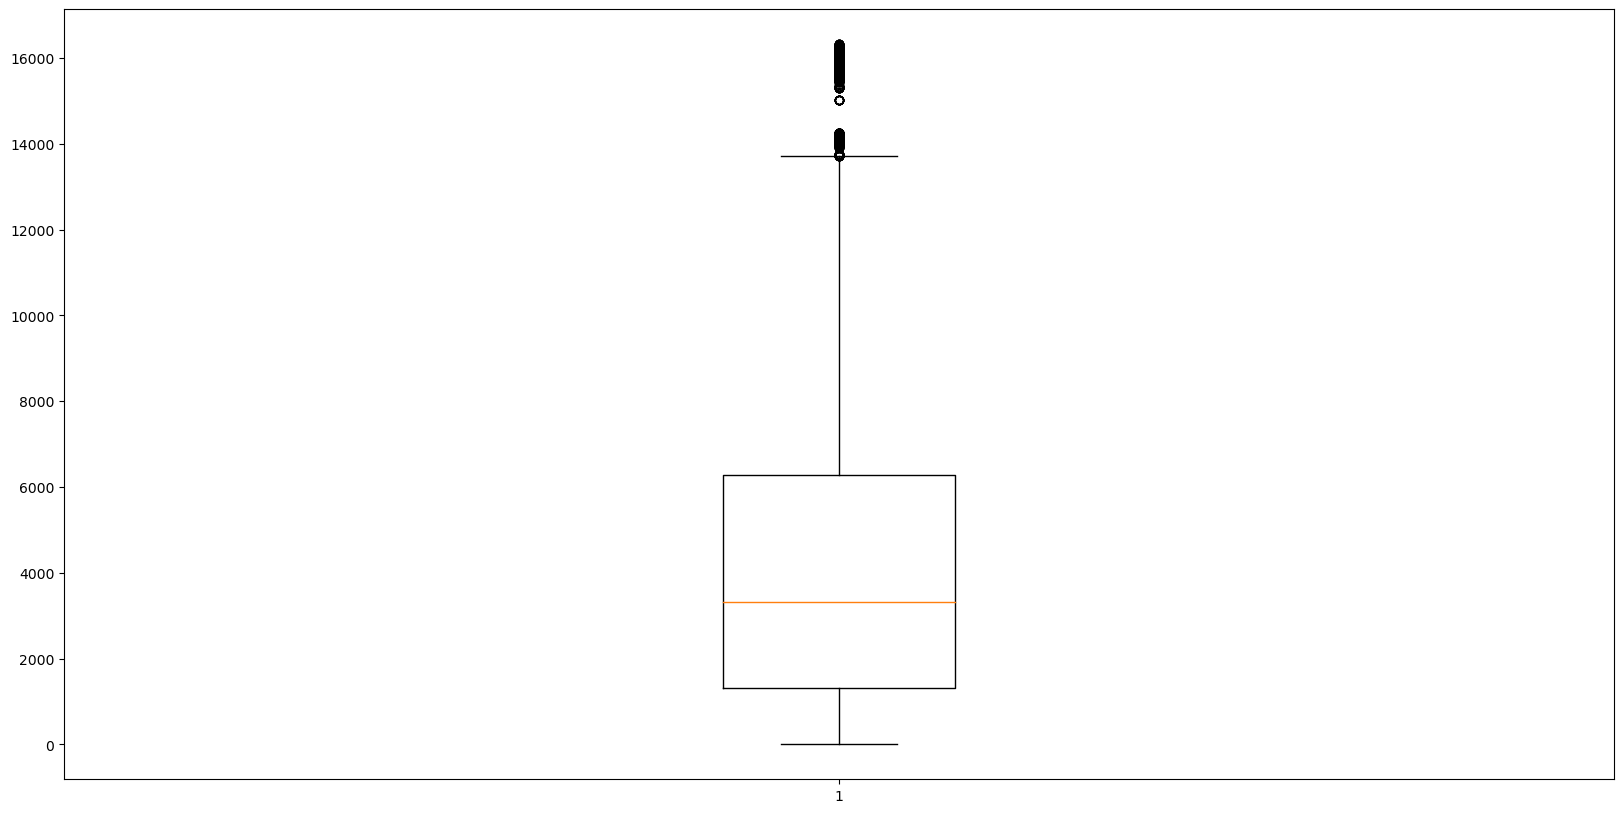

In [35]:
# Mengecek Outlier
plt.figure(figsize=(20,10))
plt.boxplot(df['BLOCK'])
plt.show()

In [14]:
missing_values = ['n/a,', 'na', '--']
df  = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values = missing_values)
df['BLOCK']

0         392
1         399
2         399
3         402
4         404
         ... 
84543    7349
84544    7349
84545    7351
84546    7100
84547    7105
Name: BLOCK, Length: 84548, dtype: int64

In [15]:
missing_values = ['n/a,', 'na', '--']
df  = pd.read_csv('dataset/nyc-rolling-sales.csv', na_values = missing_values)
df['LOT']

0          6
1         26
2         39
3         21
4         55
        ... 
84543     34
84544     78
84545     60
84546     28
84547    679
Name: LOT, Length: 84548, dtype: int64

In [18]:
mean_block = df['BLOCK'].mean()
print(mean_block)

4237.218976202867


In [19]:
std_block = df['BLOCK'].std()
print(std_block)

3568.263406631062


In [20]:
bound = 3 * std_block

In [21]:
upper_bound = mean_block + 3 * std_block
lower_bound = mean_block - 3 * std_block

print('Upper Bound:', upper_bound)
print('Lower Bound:', lower_bound)

Upper Bound: 14942.009196096053
Lower Bound: -6467.571243690319


In [22]:
print((df['BLOCK'] < lower_bound).sum())
print((df['BLOCK'] > upper_bound).sum())

0
1034


In [23]:
df_no_outliers = df[(df['BLOCK'] >= lower_bound) & (df['BLOCK'] <= upper_bound)]

In [24]:
print((df_no_outliers['BLOCK'] > upper_bound).sum())

0


In [25]:
df_no_outliers.shape

(83514, 22)

In [26]:
df_no_outliers.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


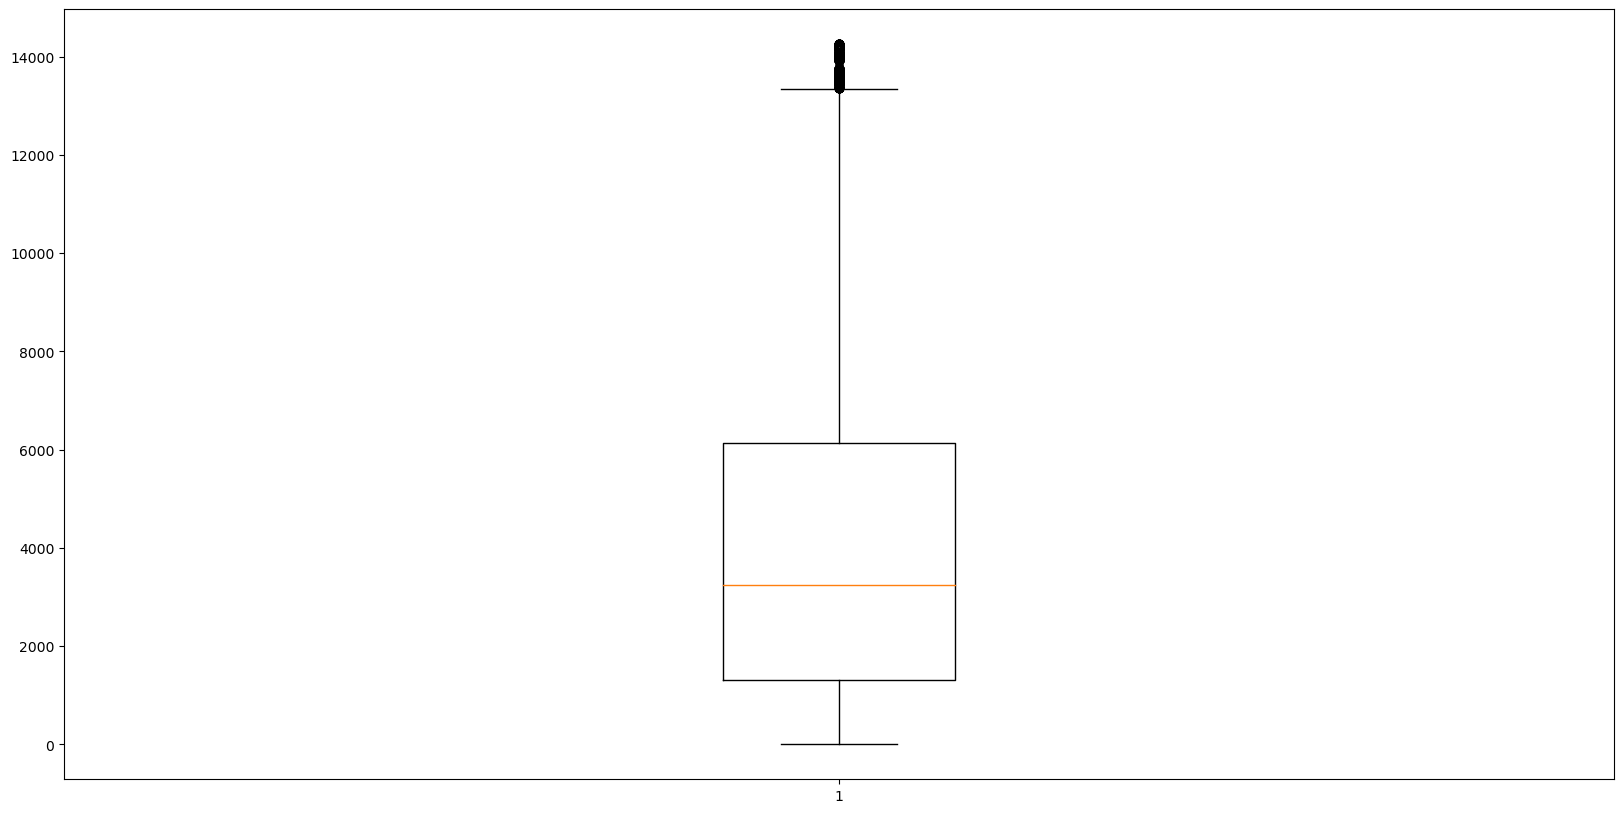

In [28]:
plt.figure(figsize=(20,10))
plt.boxplot(df_no_outliers['BLOCK'])
plt.show()

### Mean

In [62]:
df ['BLOCKmean'] = df ['BLOCK'].mean()
df ['BLOCKmean'] 
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BLOCKmean
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,4237.218976
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,4237.218976
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,4237.218976
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,4237.218976
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,4237.218976


In [37]:
mean = df['BLOCK'].mean()
print("Mean Block : ", mean_block )

Mean Block :  4237.218976202867


### Median

In [49]:
median_ = df['LOT'].median()
print("Median Lot : ", median)

Median Lot :  50.0


### Mode

In [50]:
mode = statistics.mode(df['BUILDING CLASS AT TIME OF SALE'])
print("Mode Building Class At Time Of Sale : ", mode)

Mode Building Class At Time Of Sale :  R4


### Range

In [52]:
# Menentukan range dari kolom 'LOT'
lot_range = df['LOT'].min(), df['LOT'].max()

# Menentukan range dari kolom 'BLOCK'
block_range = df['BLOCK'].min(), df['BLOCK'].max()

# Menampilkan hasil
print('Range for LOT:', lot_range)
print('Range for BLOCK:', block_range)

Range for LOT: (1, 9106)
Range for BLOCK: (1, 16322)


### Variance

In [54]:
var_lot = statistics.variance(df['LOT'])
var_block= statistics.variance(df['BLOCK'])

print("Variance Lot :", var_lot)
print("Variance Block :", var_block)

Variance Lot : 433144.0659415524
Variance Block : 12732503.73910221


### Standard Deviasi

In [55]:
np.std(df)

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


BOROUGH                         1.289782
BLOCK                        3568.242305
LOT                           658.132922
ZIP CODE                     1290.871513
RESIDENTIAL UNITS              16.720938
COMMERCIAL UNITS                8.713132
TOTAL UNITS                    18.972472
YEAR BUILT                    537.341816
TAX CLASS AT TIME OF SALE       0.819336
dtype: float64

In [57]:
std_block = statistics.stdev(df['BLOCK'])
std_lot = statistics.stdev(df['LOT'])

print("Standard Deviasi Block :", std_block)
print("Standard Deviasi Lot :", std_lot)

Standard Deviasi Block : 3568.263406631048
Standard Deviasi Lot : 658.1368139996063


### Probability

#### apakah data gross land feet merupakan distribusi normal?

Text(0, 0.5, 'Frequency/Probability Density')

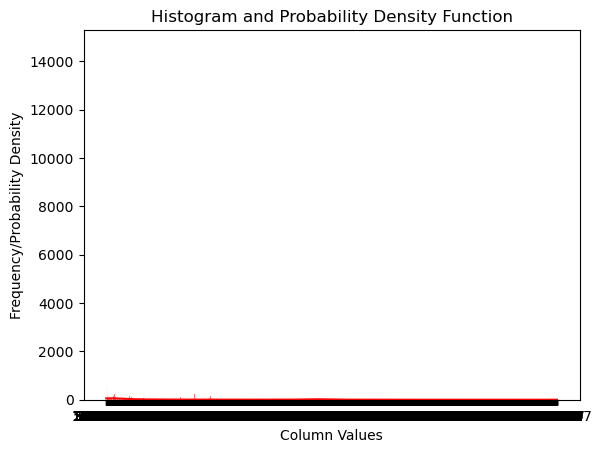

In [58]:
glf = df['SALE PRICE']

# Plot histogram
sns.histplot(glf, kde=True, color='red')
plt.title('Histogram and Probability Density Function')
plt.xlabel('Column Values')
plt.ylabel('Frequency/Probability Density')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_31196\3684205602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['BLOCK'],


[Text(0.5, 0, 'BLOCK'), Text(0.5, 1.0, 'Sub Divisi Tempat Wilayah Properti')]

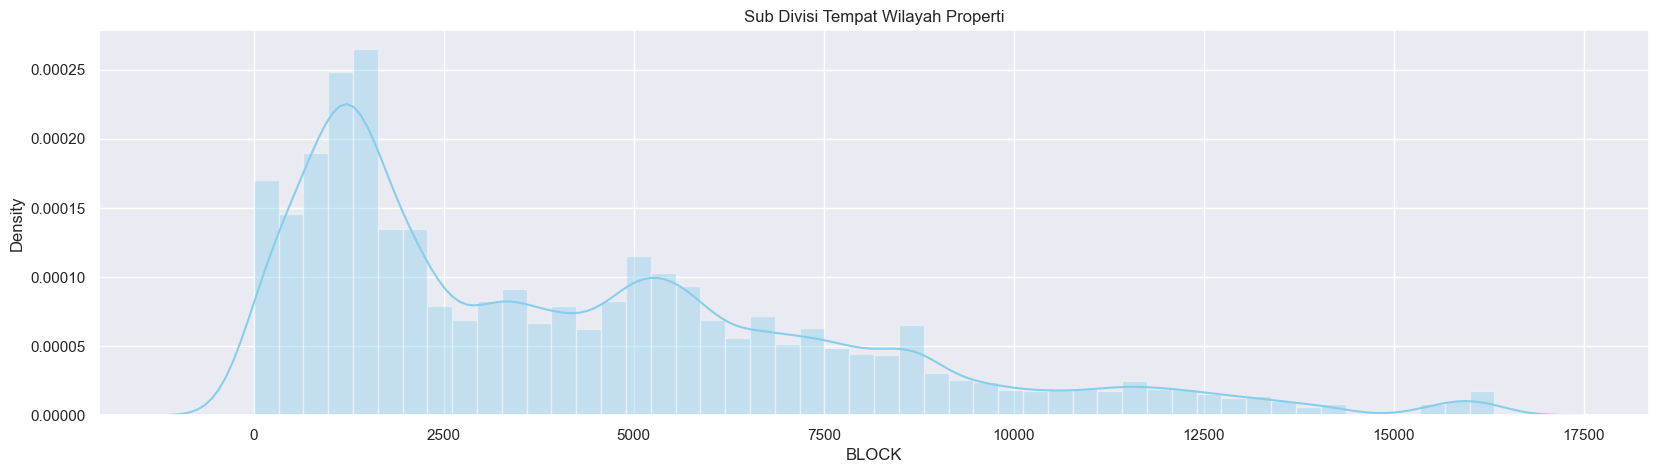

In [59]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.distplot(df['BLOCK'],
                  kde = True,
                  color = 'skyblue')
ax.ticklabel_format(style = 'plain')
ax.set(xlabel = 'BLOCK', title = 'Sub Divisi Tempat Wilayah Properti')

### Confidence

In [65]:
confidence_interval = stats.t.interval(0.95, len(df['LOT']) - 1, loc=df['LOT'].mean(), scale=stats.sem(df['LOT']))

# Menampilkan hasil confidence interval
print("Confidence Interval (95%):", confidence_interval)

Confidence Interval (95%): (371.7877360455249, 380.66029347616694)


### Hypotesis

In [66]:
from scipy.stats import pearsonr
L = df['LOT']
B = df['BLOCK']

stat, p = pearsonr(L, B)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else:
    print('Probably dependent')

stat=-0.229, p=0.000
Probably dependent


### Inisght : 
Mengindikasikan bahwa ada hubungan yang signifikan antara LOT dan BLOCK. LOT dan BLOCK memiliki korelasi negatif yang signifikan, yang berarti ketika satu variabel naik, yang lainnya cenderung turun, dan sebaliknya.

---